### 정상적으로 peak 뽑은 sample

In [103]:
import pickle
import pandas as pd

f_example = '4.0,7972,PACU1_5_201013_140323.csv'
f_ppg = 'cache/PPG_peaks/'+f_example
e_ppg = 'cache/ECG_peaks/'+f_example
vital_path = 'NRS_vital_pickle_unzip/NRS_vital_pickle'

df_vital = pickle.load(open(vital_path+'/'+f_example, 'rb'))

minlist, maxlist = pickle.load(open(f_ppg,'rb'))
r_peak_list = pickle.load(open(e_ppg, 'rb'))

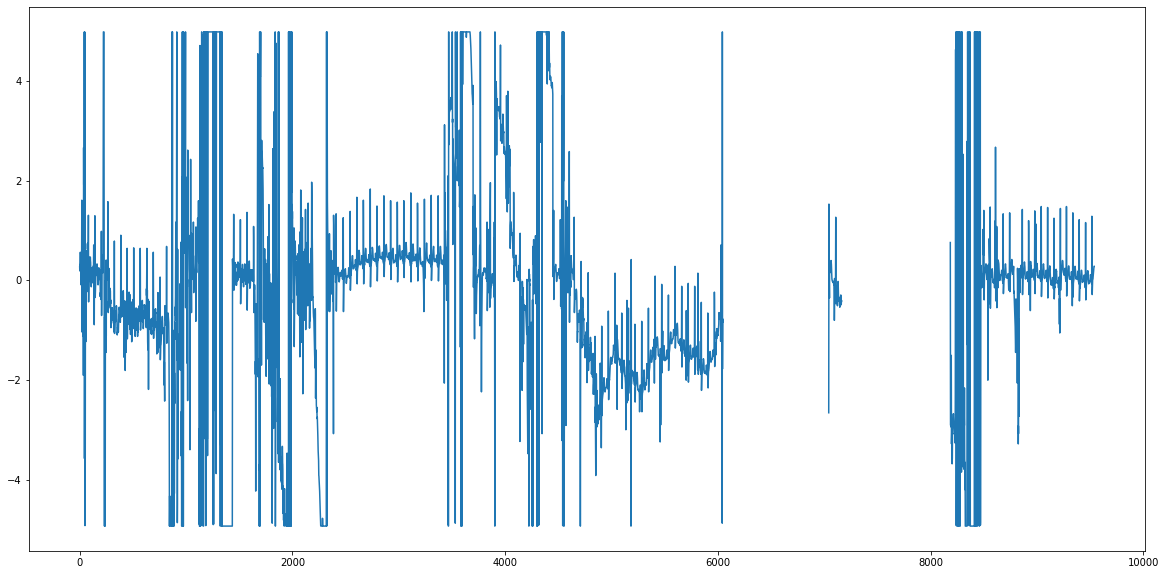

In [104]:
plt.figure(figsize=(20,10))
plt.plot(df_vital['ECG'].tolist())

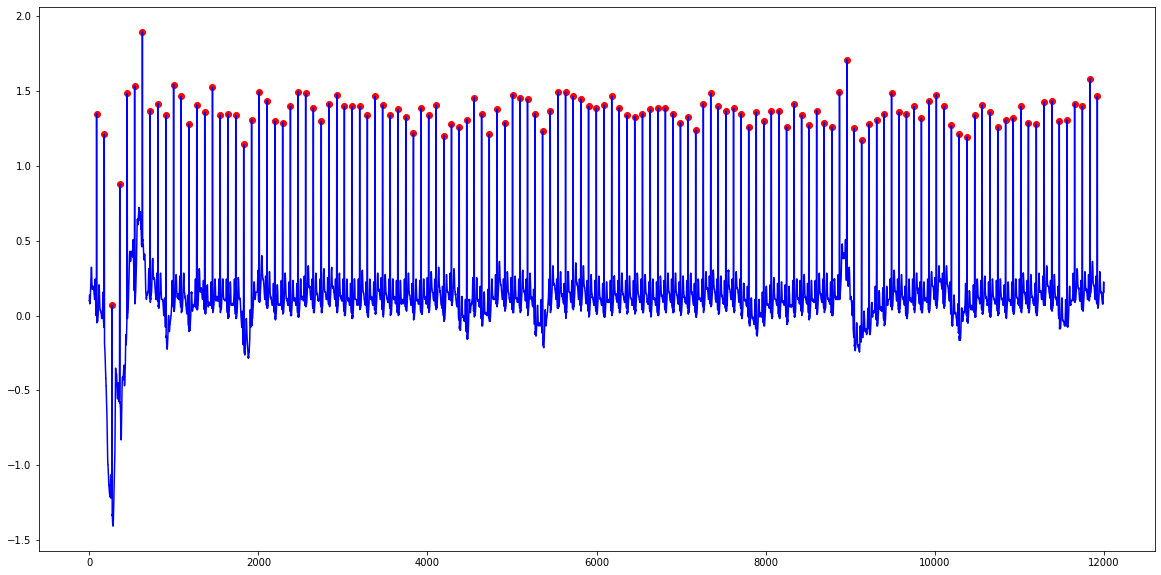

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(df_vital['ECG'].tolist(), color = 'blue')
plt.scatter(r_peak_list, [df_vital['ECG'].tolist()[i] for i in r_peak_list], color = 'red')

plt.show()

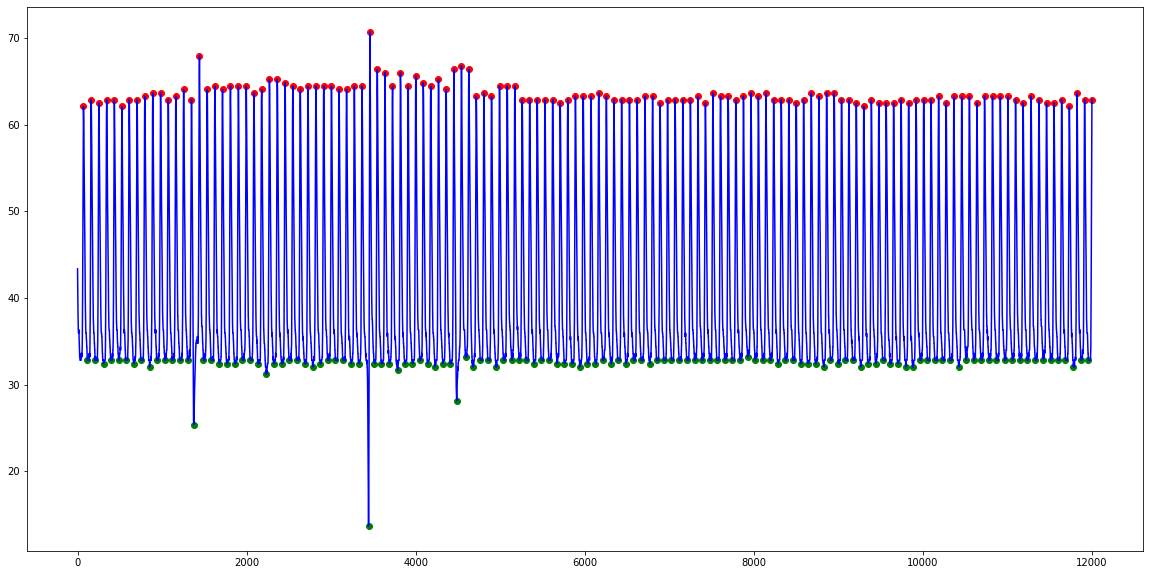

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(df_vital['Pleth'].tolist(), color = 'blue')
plt.scatter(maxlist, [df_vital['Pleth'].tolist()[i] for i in maxlist], color = 'red', label = 'maxlist')
plt.scatter(minlist, [df_vital['Pleth'].tolist()[i] for i in minlist], color = 'green', label = 'minlist')
plt.show()

## peak detection에서 error가 생긴 samples

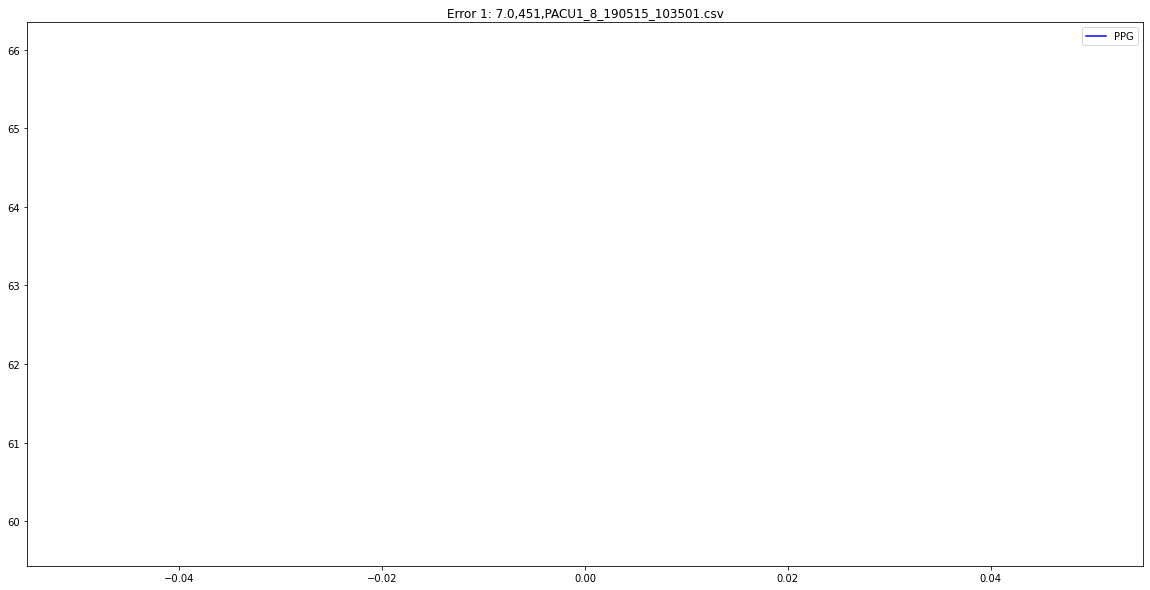

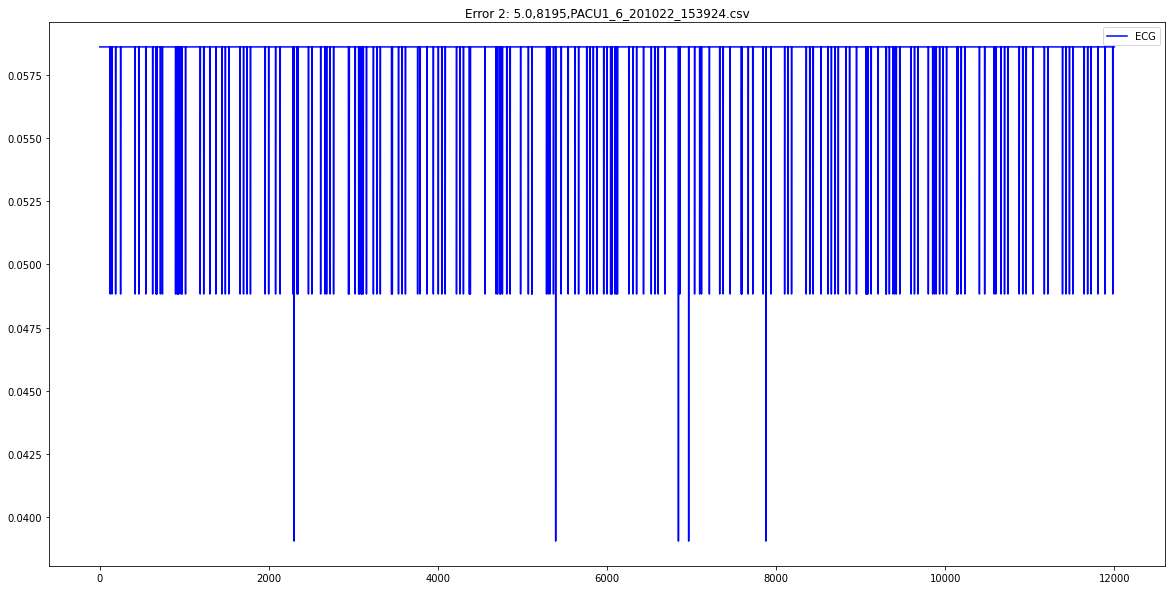

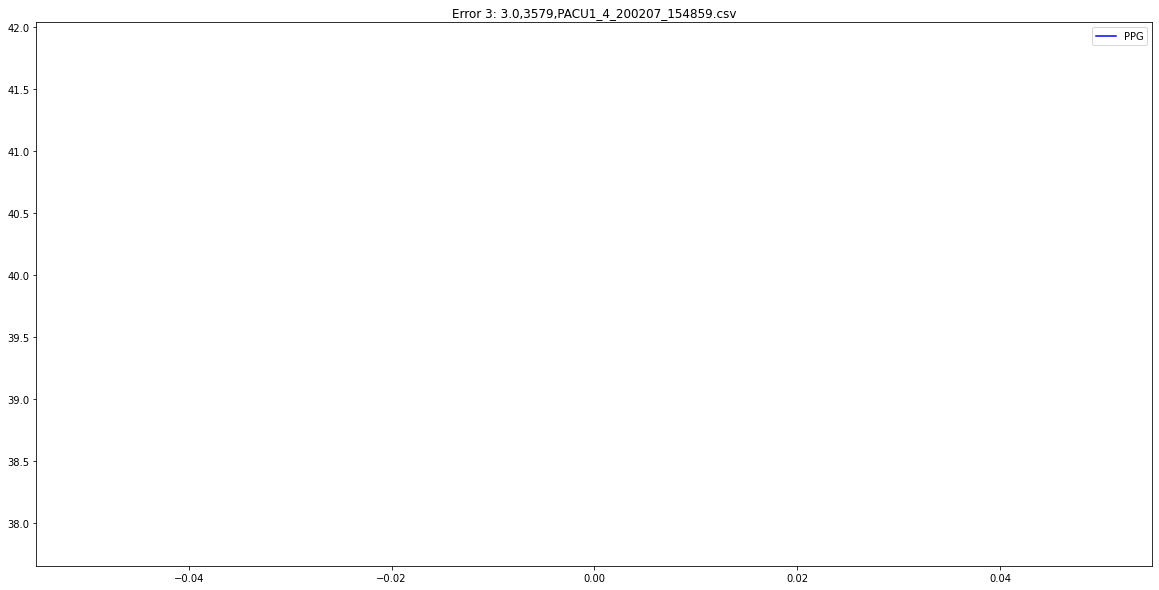

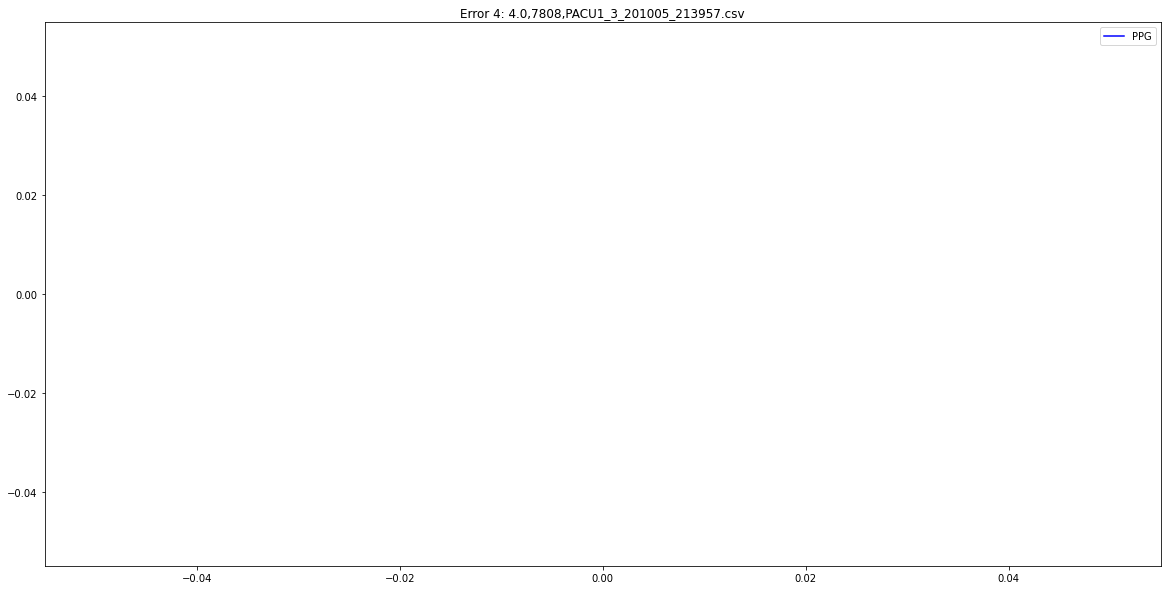

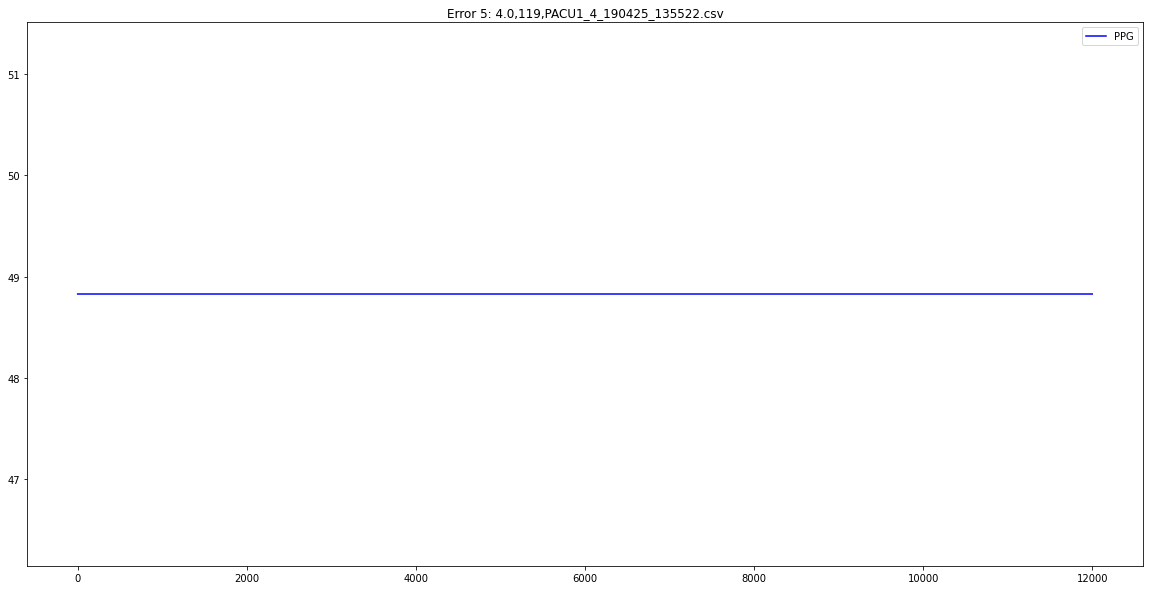

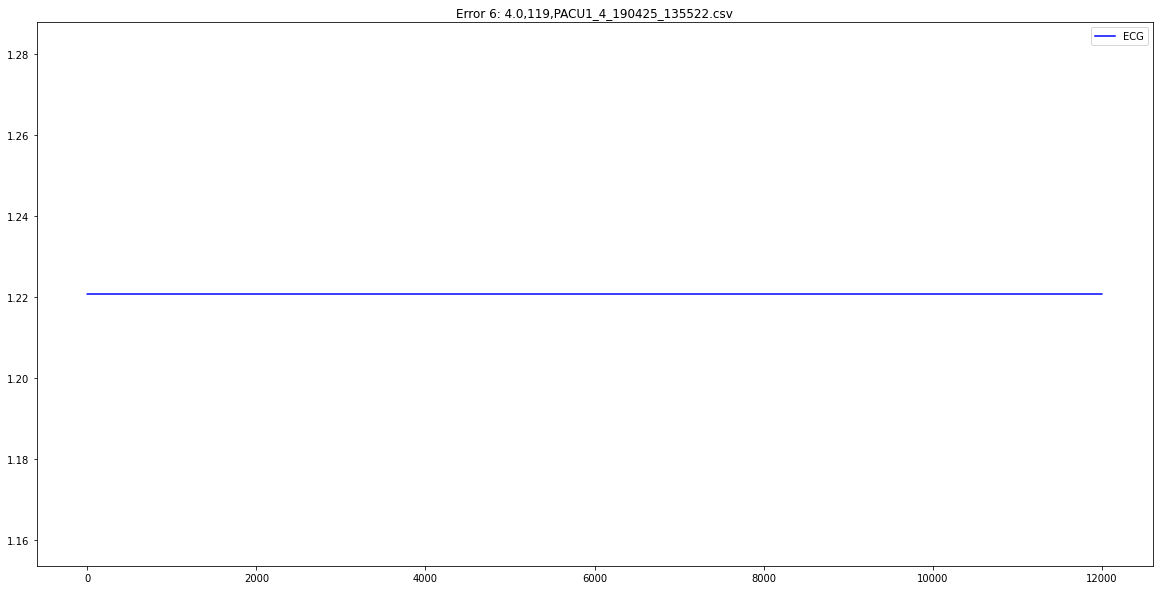

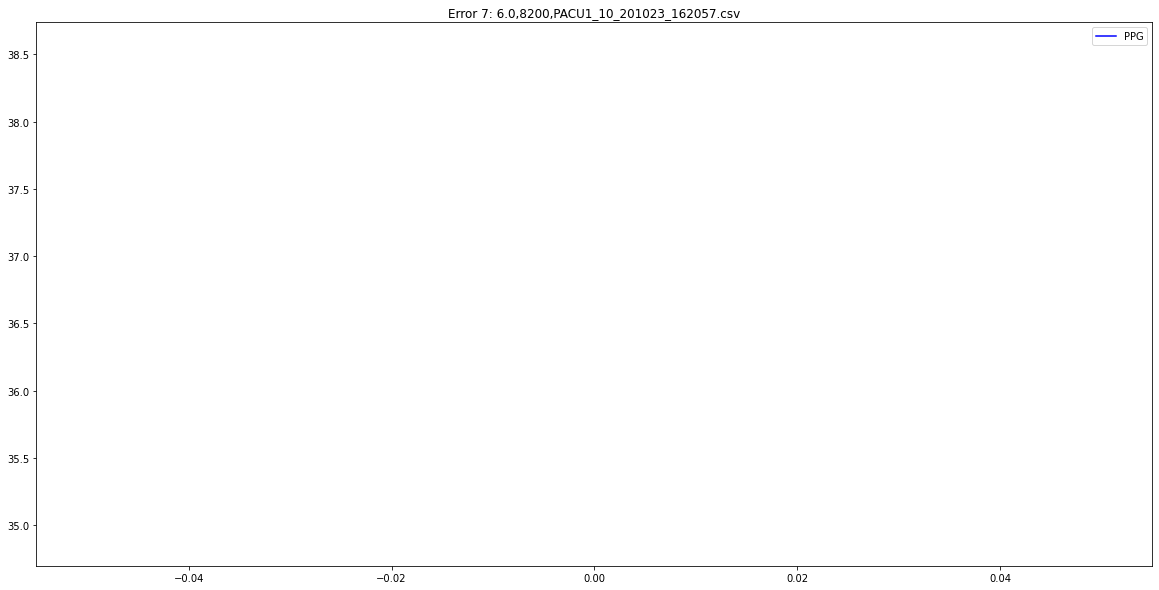

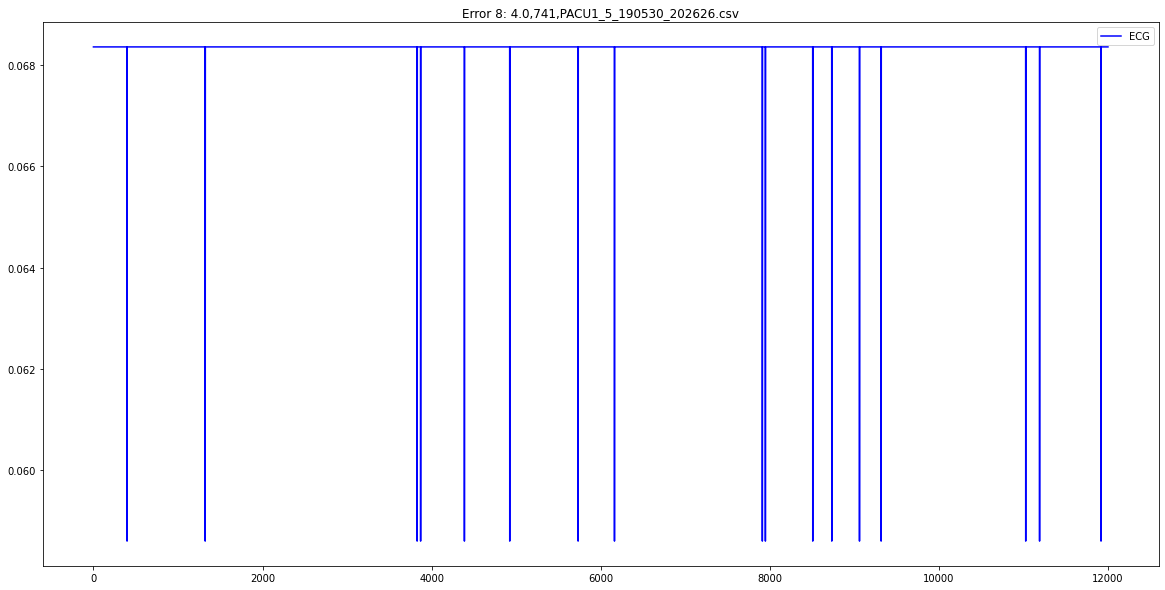

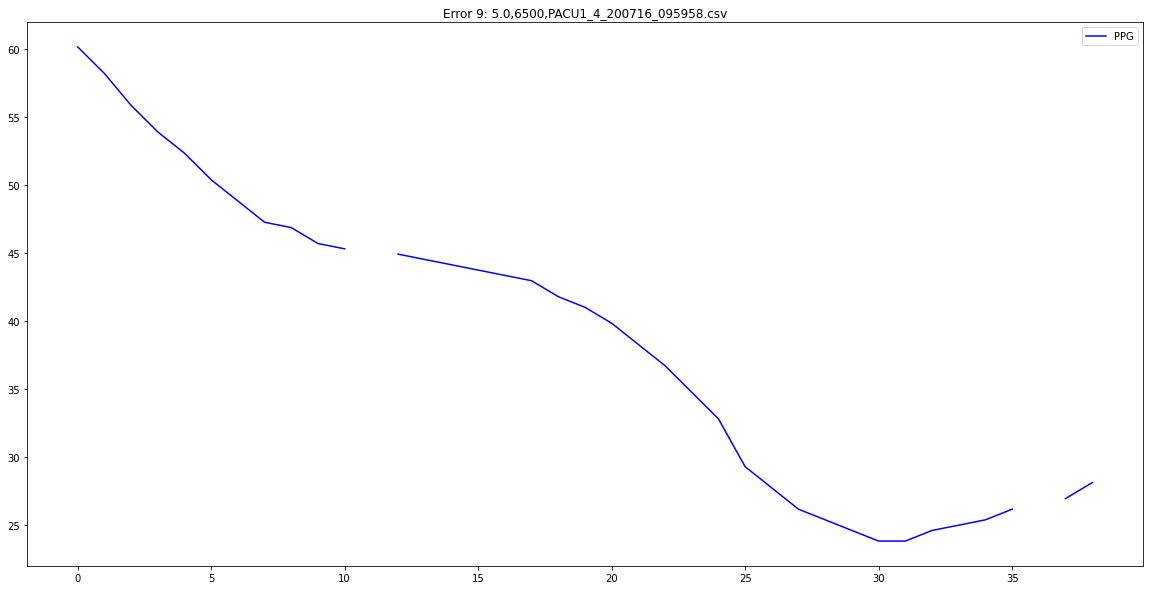

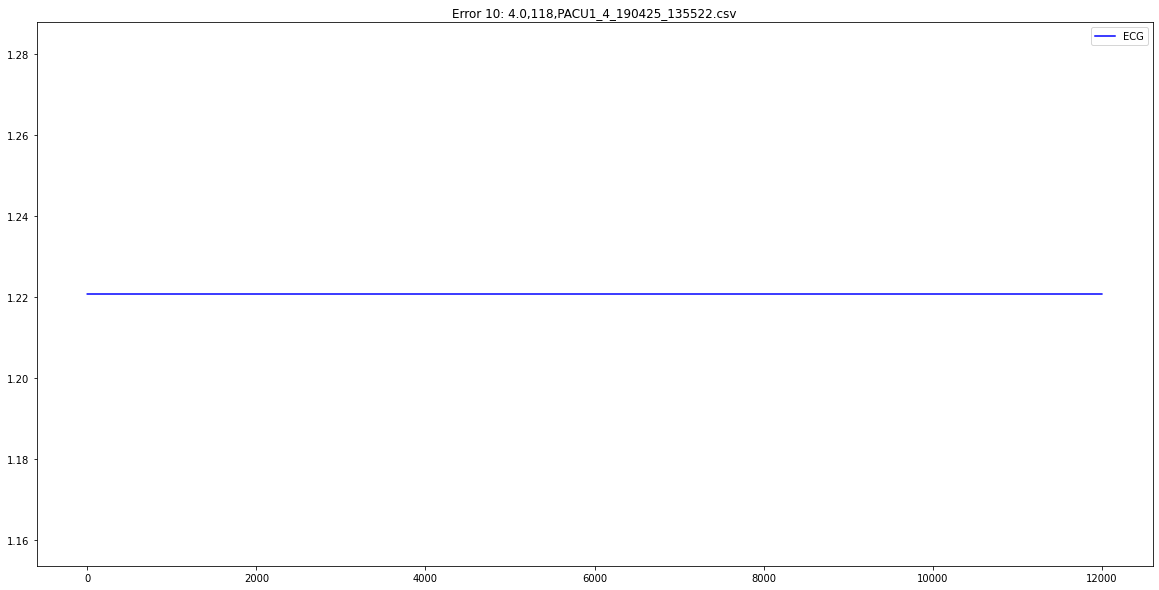

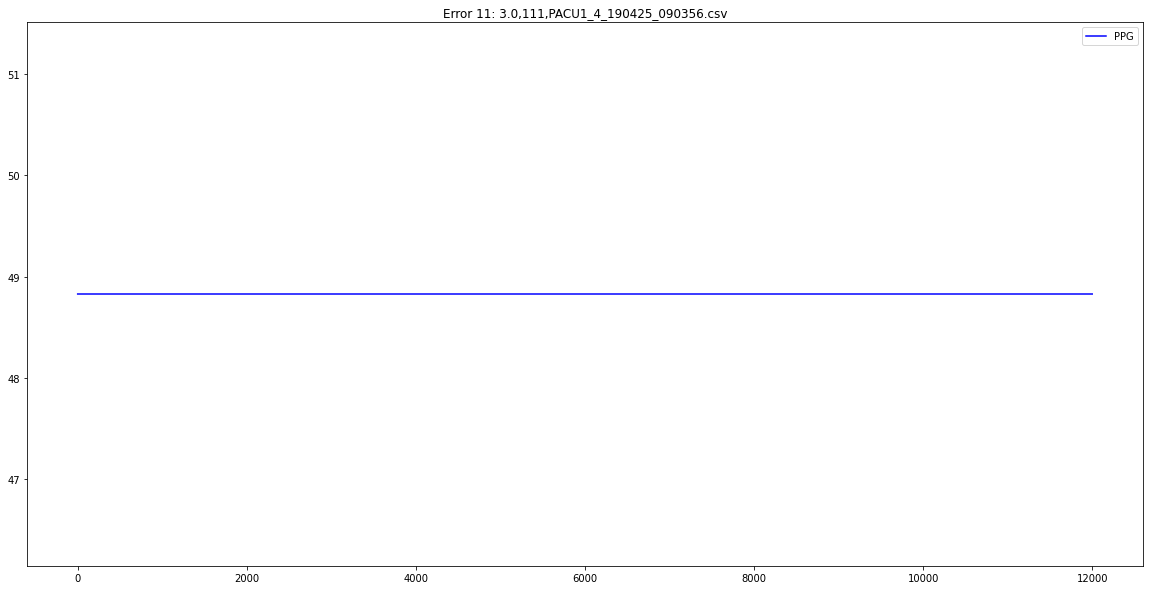

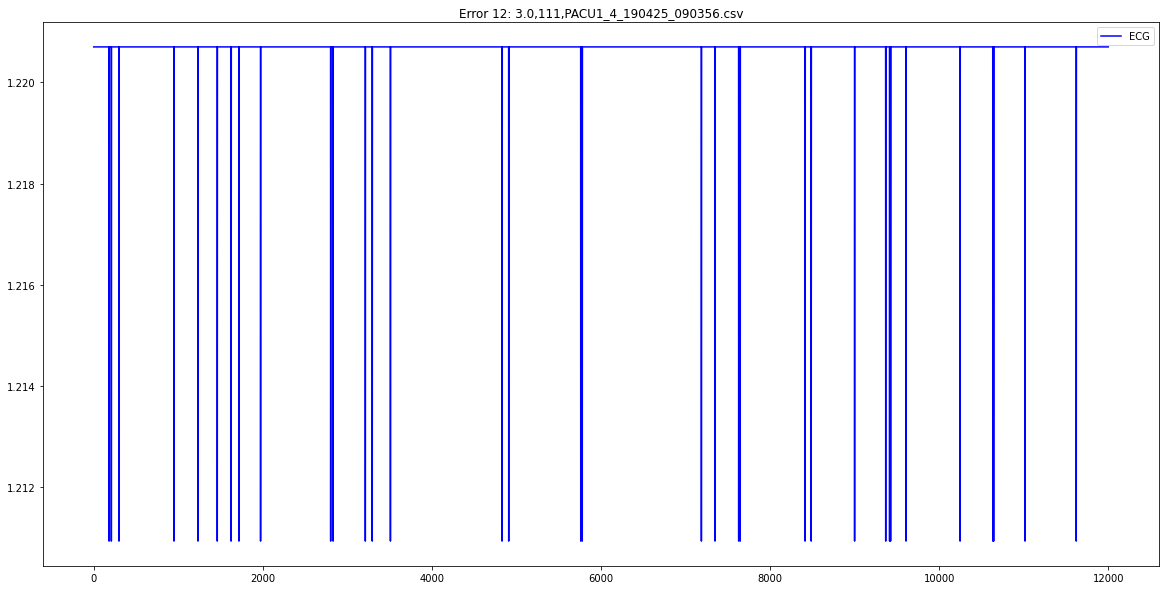

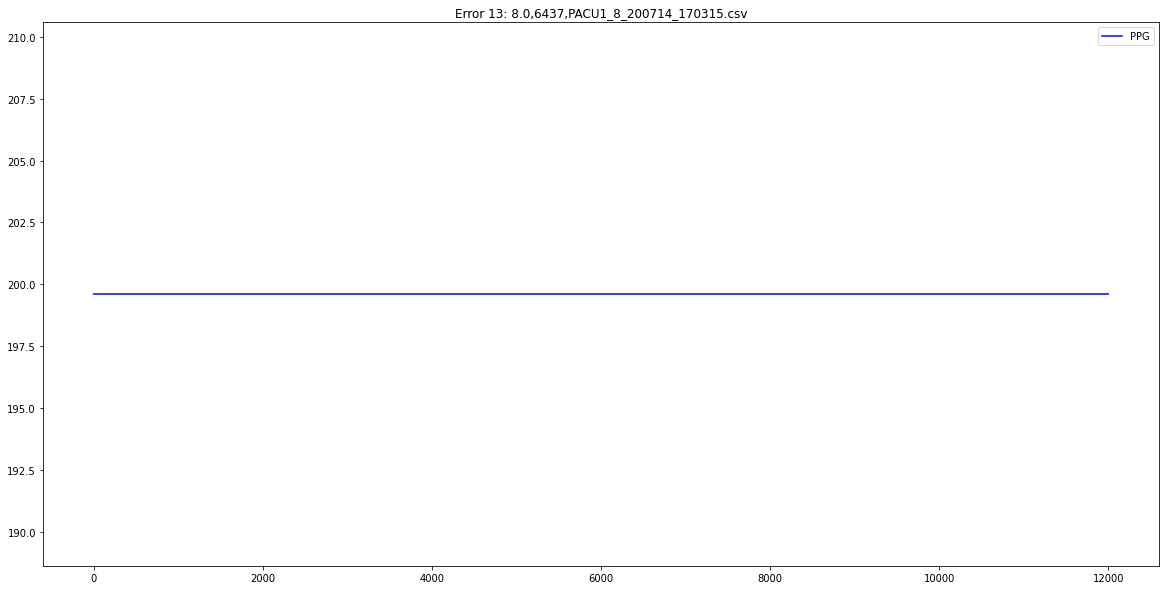

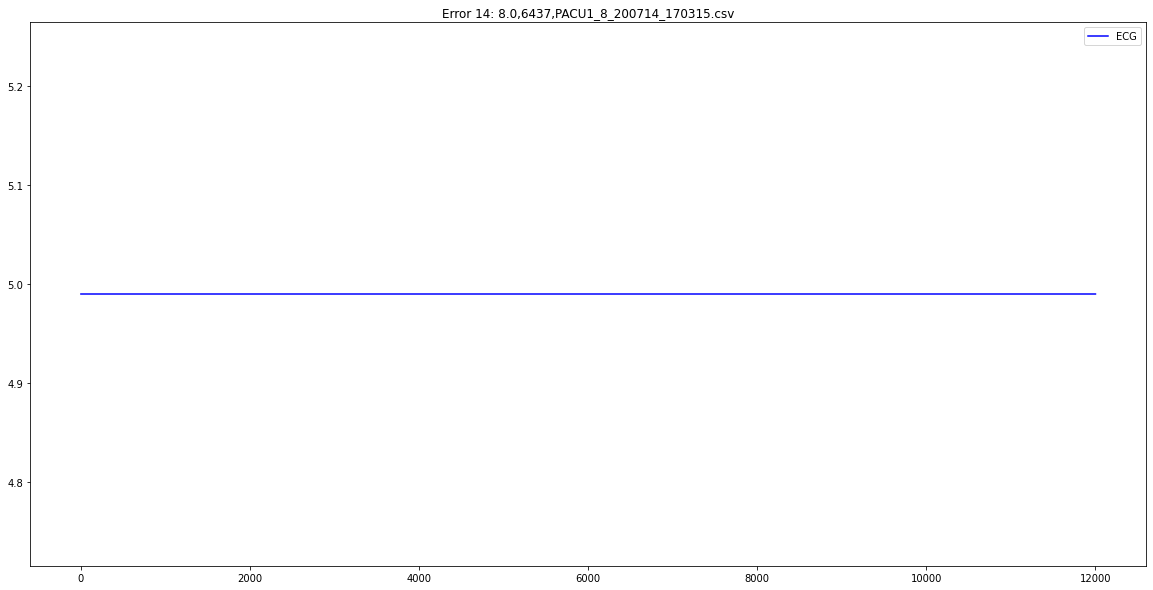

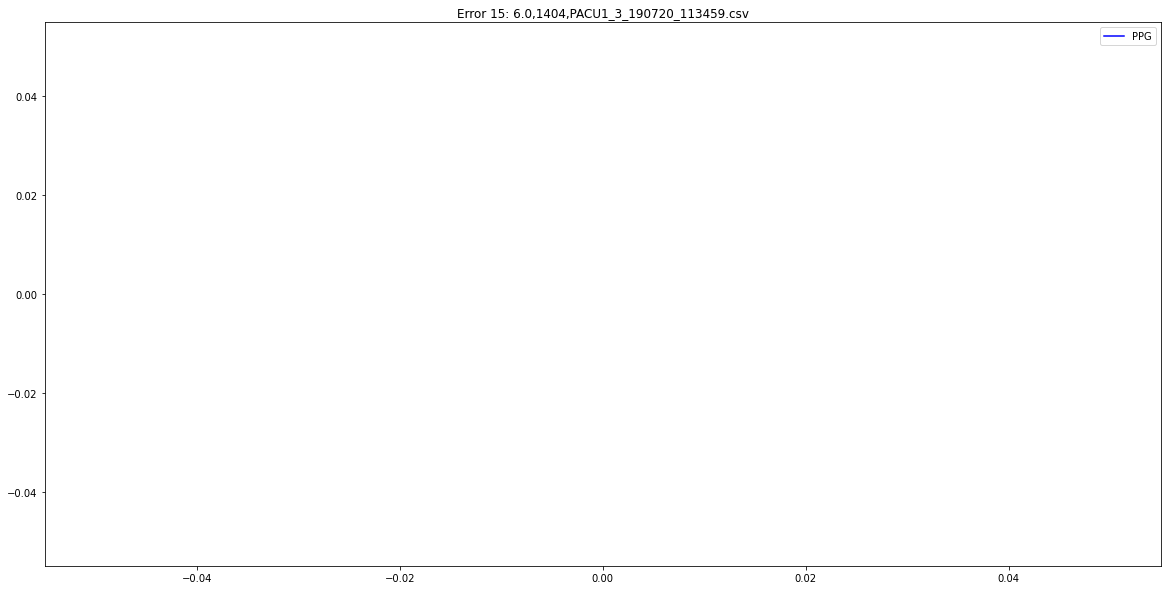

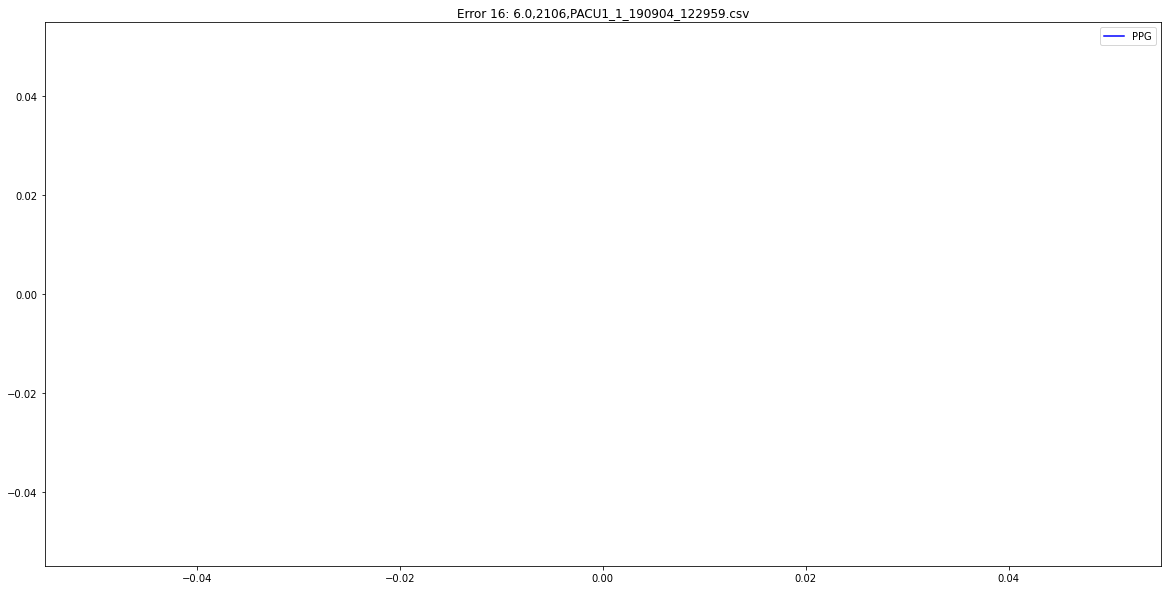

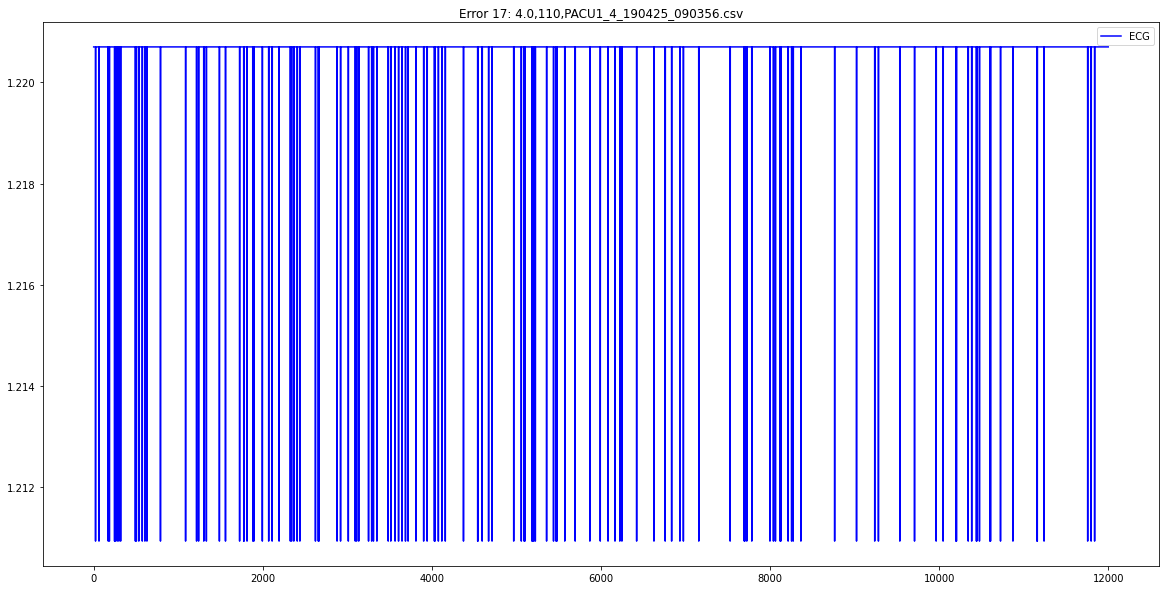

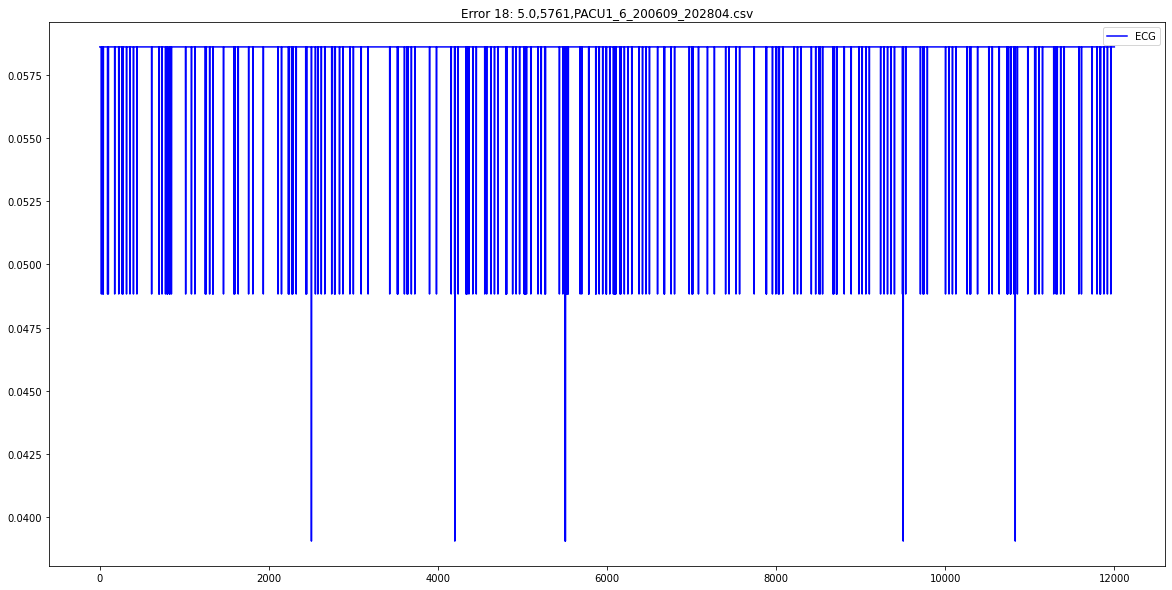

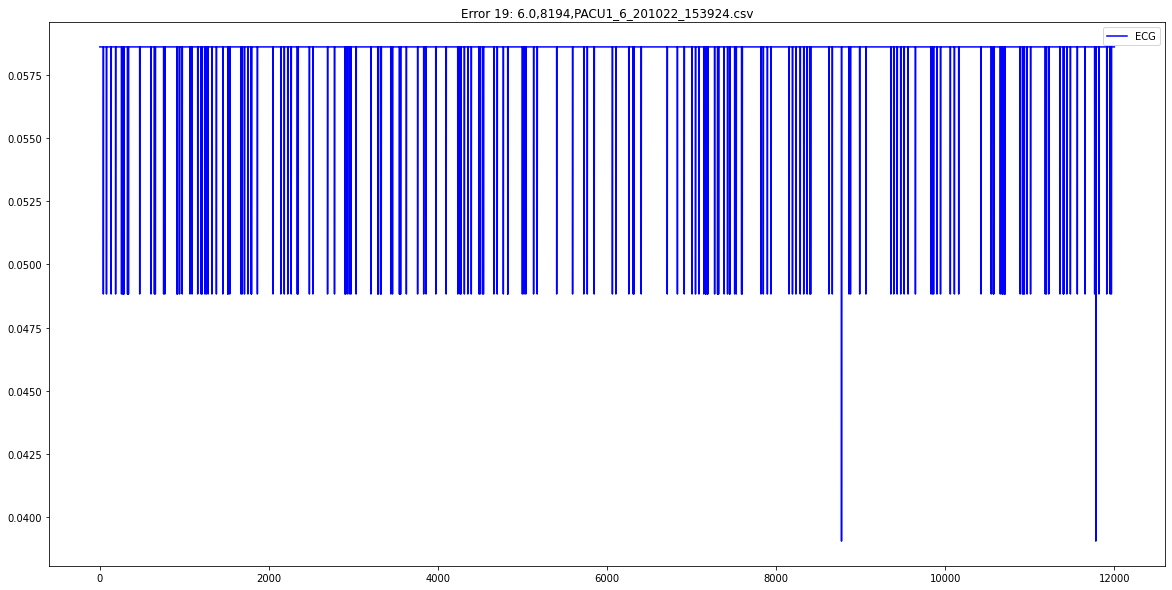

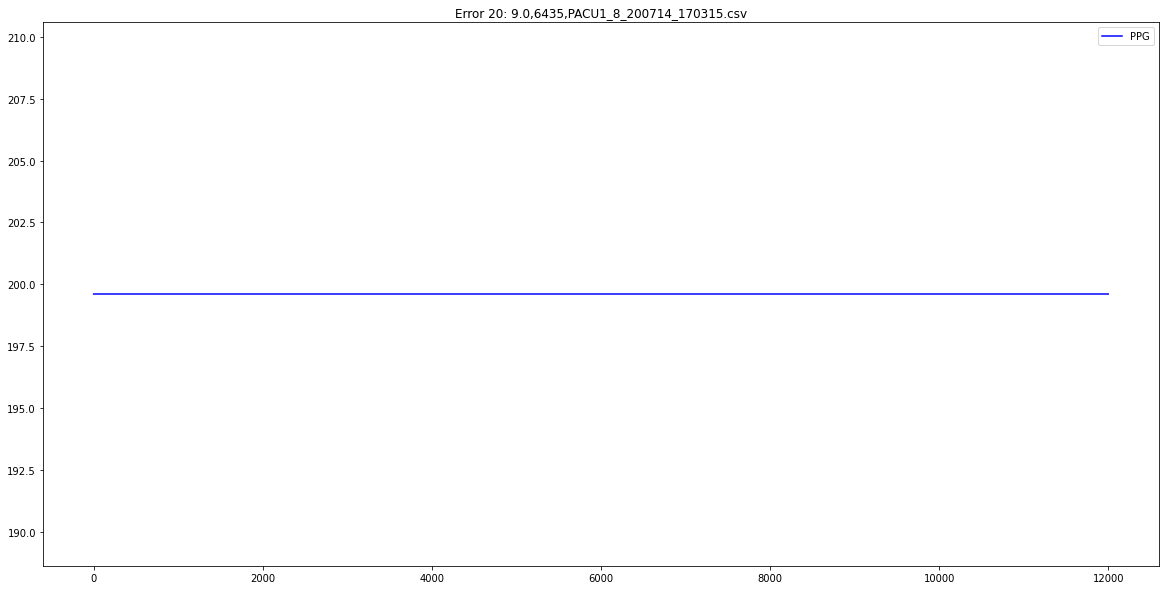

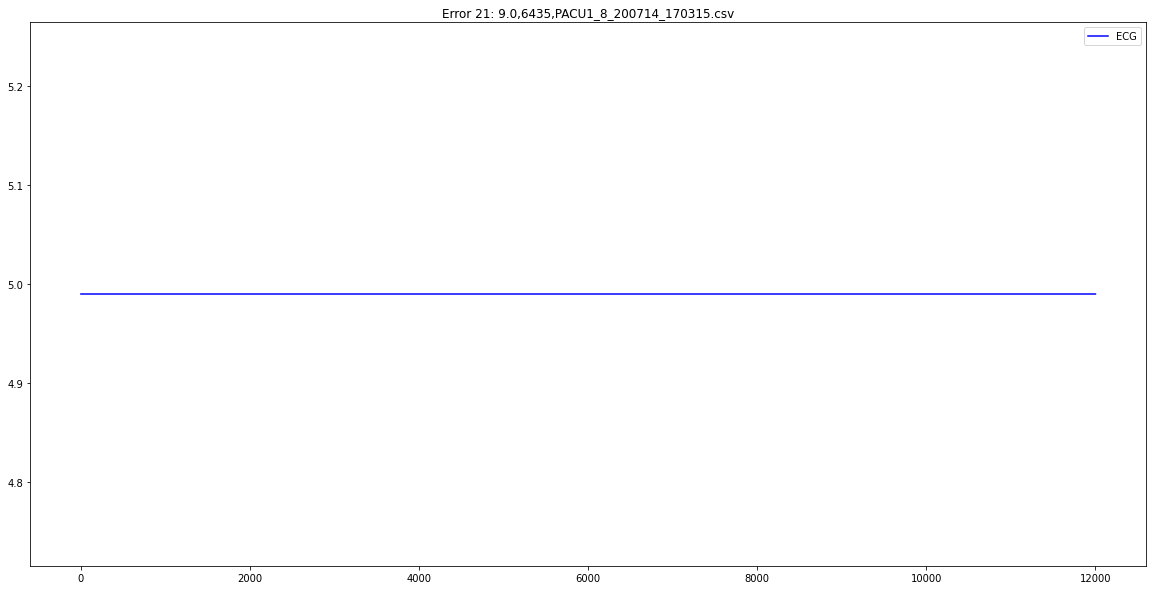

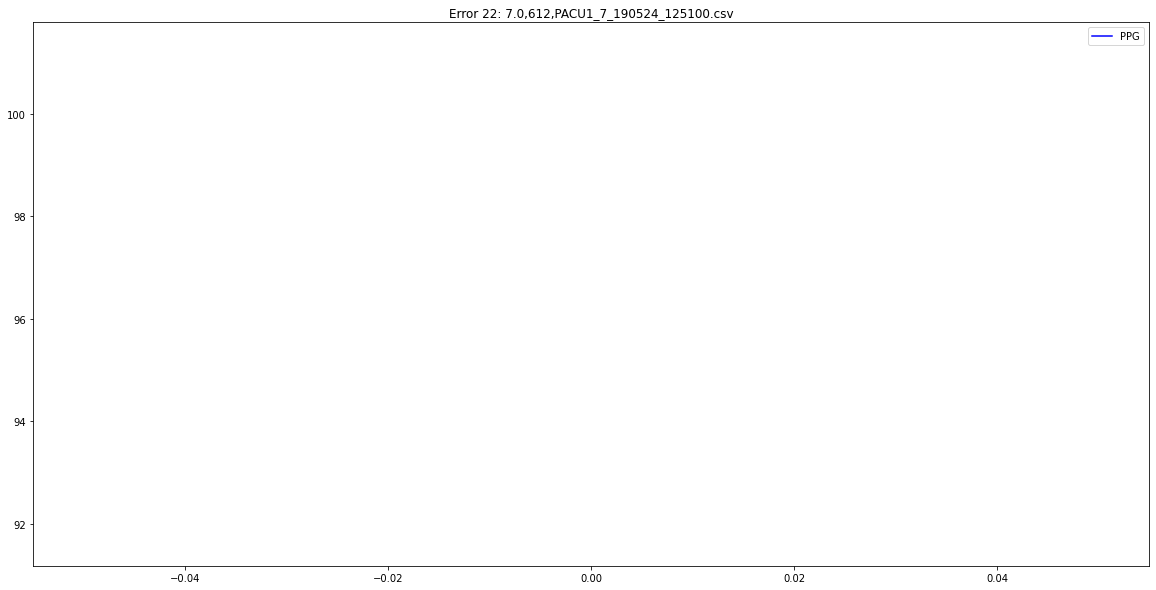

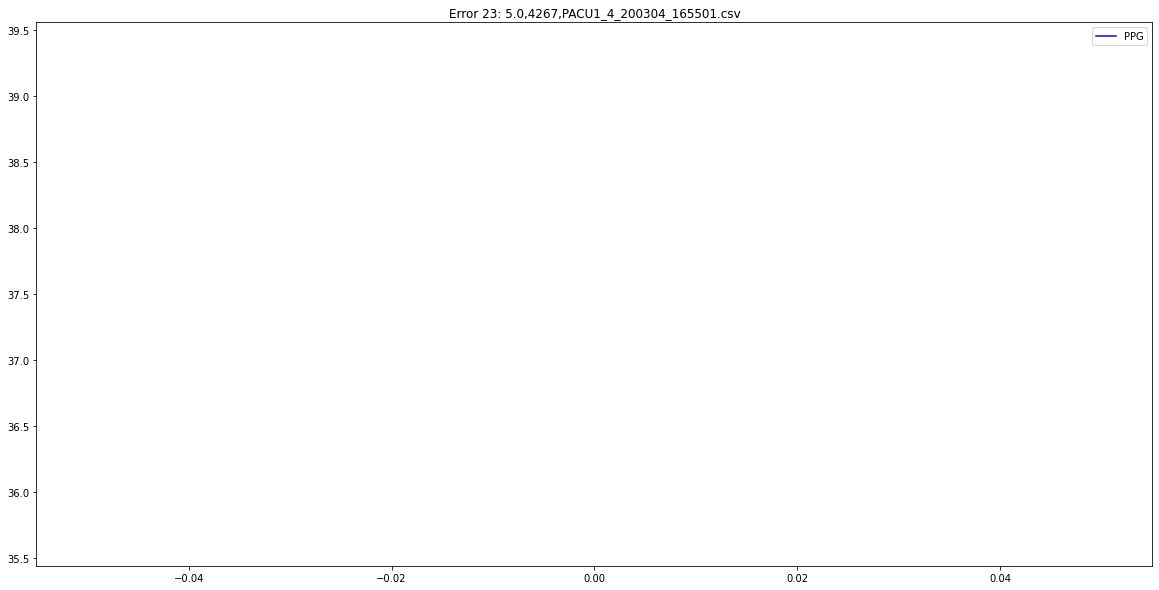

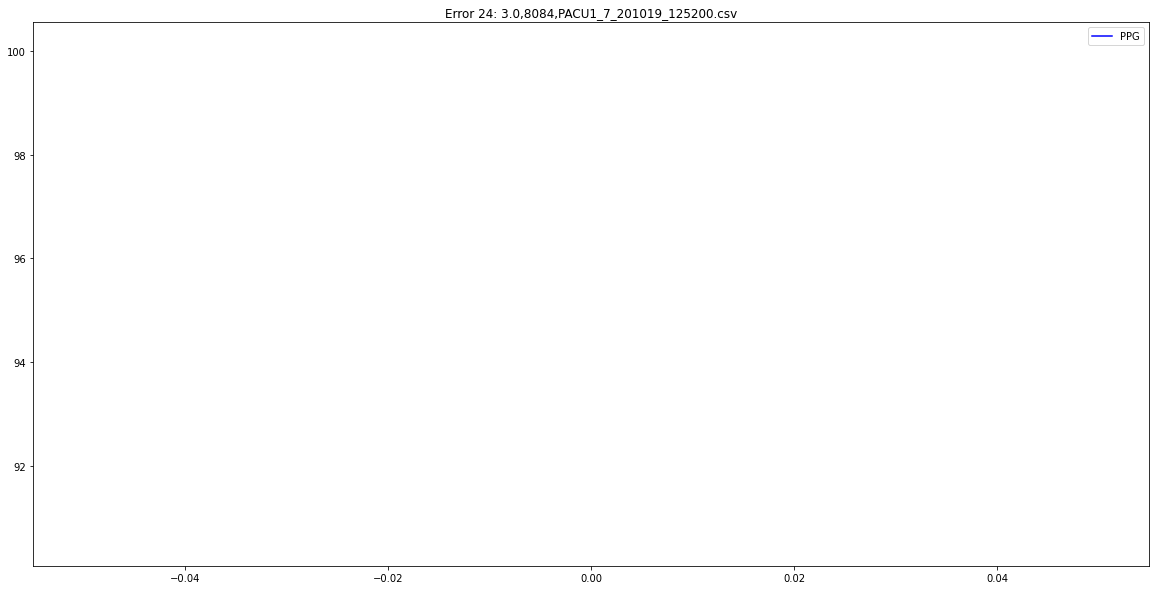

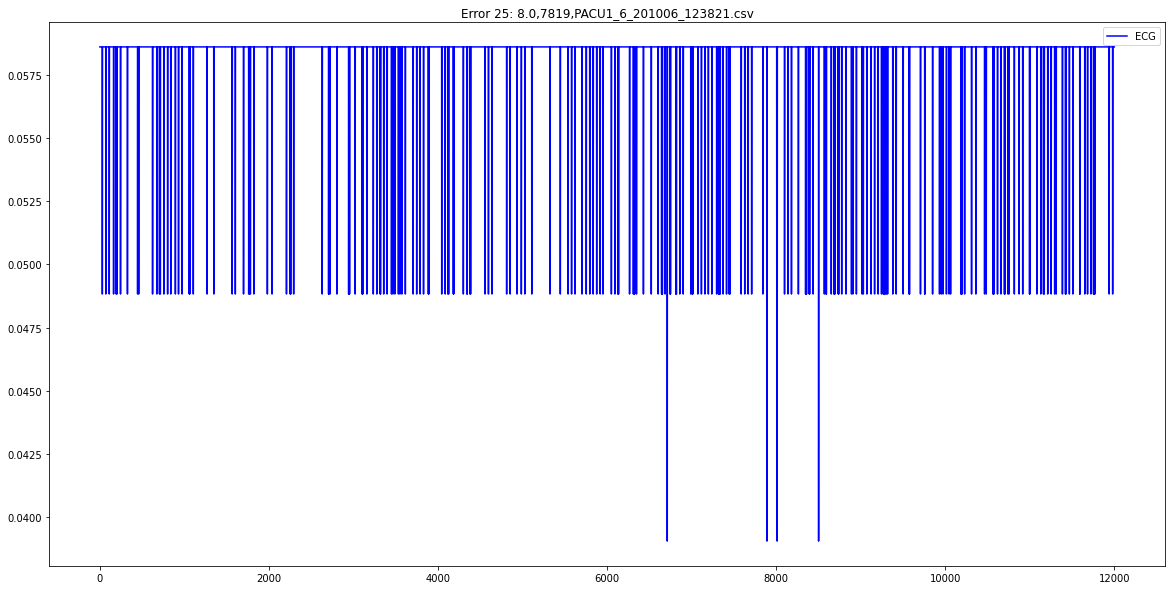

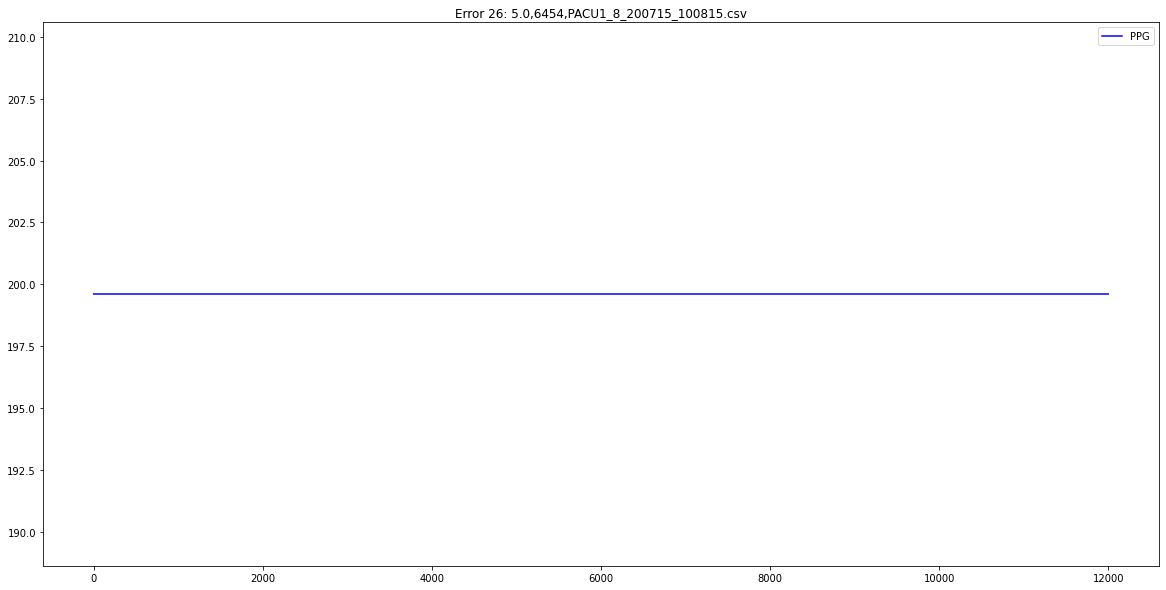

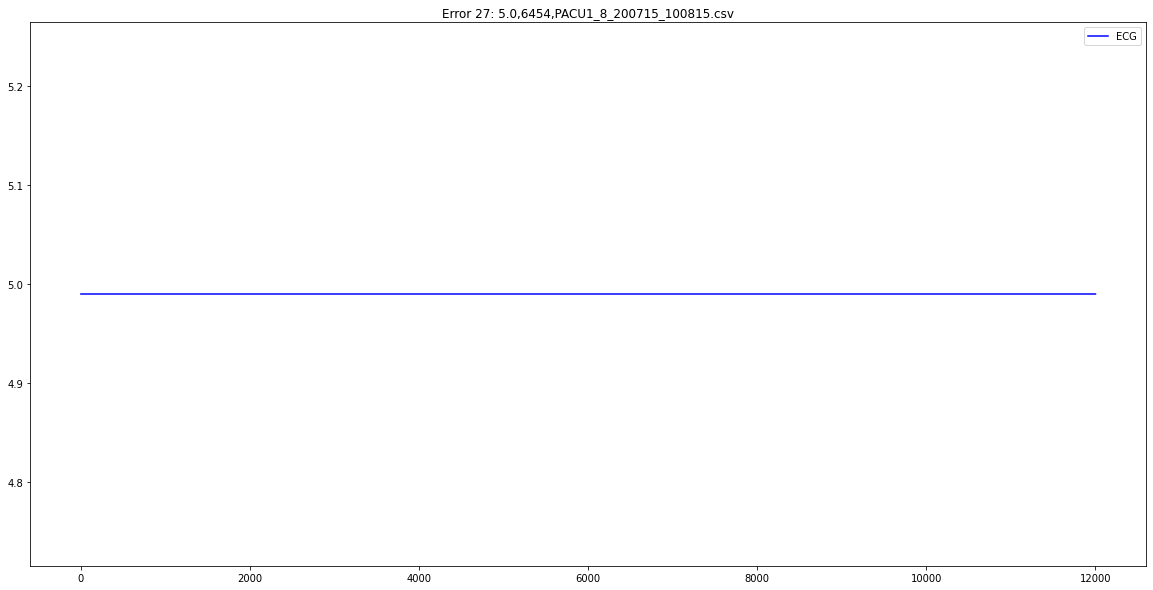

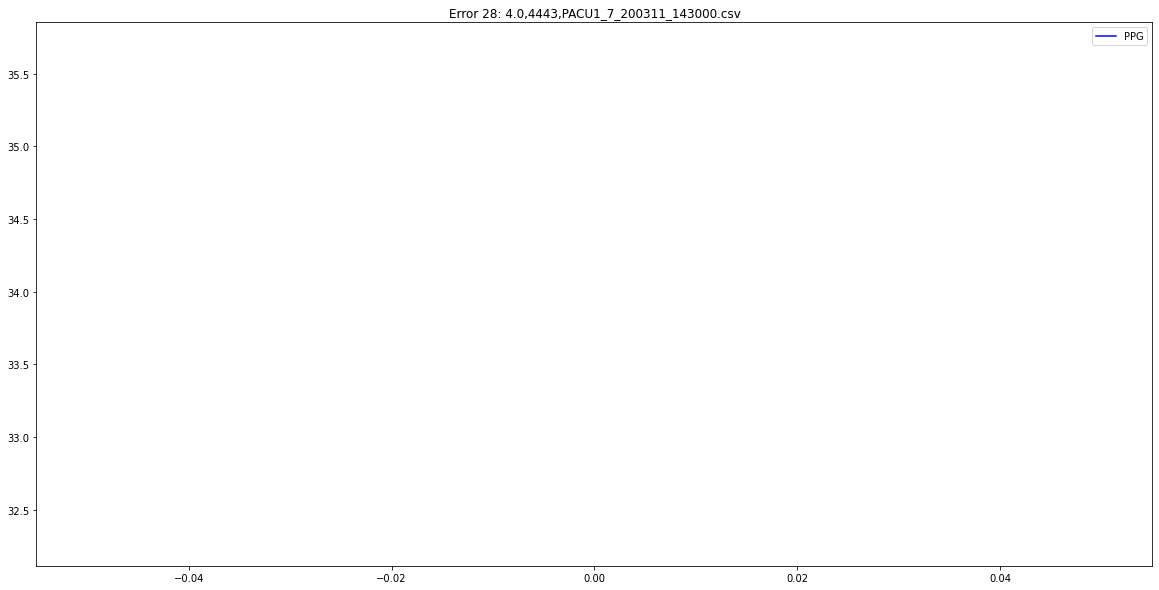

In [32]:
import os, sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from SPI_model.pyvital2 import arr


#errors의 file, type, error가 담긴 list 불러오기
error_list = pickle.load( open('cache/peak_detect_error_list','rb'))

err_cnt = 0
for error in error_list:
    err_cnt = err_cnt + 1
    df_err_samp = pickle.load(open(vital_path+'/'+error['file'], 'rb'))
    if error['type'] == 'ECG':
        #if os.path.exists('cache/ECG_peaks/'+error['file']):
        plt.figure(figsize=(20,10))
        plt.plot(df_err_samp['ECG'].tolist(), color = 'blue', label = 'ECG')
        plt.title('Error '+str(err_cnt)+': '+str(error['file']))

        plt.legend(loc='best')
        plt.show()

    if error['type'] == 'PPG':
        #if os.path.exists('cache/PPG_peaks/'+error['file'][:-4]):
        #minlist, maxlist= arr.detect_peaks((df_err_samp[['Pleth']].fillna(method='ffill').values.flatten()), srate)
        plt.figure(figsize=(20,10))
        plt.plot(df_err_samp['Pleth'].tolist(), color = 'blue', label = 'PPG')
        plt.title('Error '+str(err_cnt)+': '+str(error['file']))

        plt.legend(loc='best')
        plt.show()
    
    
#minlist, maxlist = pickle.load(open(f_ppg,'rb'))
#r_peak_list = pickle.load(open(e_ppg, 'rb'))



In [21]:
error_list

[{'file': '7.0,451,PACU1_8_190515_103501.csv',
  'type': 'PPG',
  'error': IndexError('cannot do a non-empty take from an empty axes.')},
 {'file': '5.0,8195,PACU1_6_201022_153924.csv',
  'type': 'ECG',
  'error': ValueError('attempt to get argmin of an empty sequence')},
 {'file': '3.0,3579,PACU1_4_200207_154859.csv',
  'type': 'PPG',
  'error': IndexError('cannot do a non-empty take from an empty axes.')},
 {'file': '4.0,7808,PACU1_3_201005_213957.csv',
  'type': 'PPG',
  'error': IndexError('cannot do a non-empty take from an empty axes.')},
 {'file': '4.0,119,PACU1_4_190425_135522.csv',
  'type': 'PPG',
  'error': ValueError('attempt to get argmin of an empty sequence')},
 {'file': '4.0,119,PACU1_4_190425_135522.csv',
  'type': 'ECG',
  'error': ValueError('attempt to get argmin of an empty sequence')},
 {'file': '6.0,8200,PACU1_10_201023_162057.csv',
  'type': 'PPG',
  'error': IndexError('cannot do a non-empty take from an empty axes.')},
 {'file': '4.0,741,PACU1_5_190530_202626.

## PPG histrogram

In [89]:
import os, sys
import shutil, pickle
import pandas as pd

#상위 dir에 있는 파일 읽어오기
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from SPI_model.pyvital2 import arr


#shutil.move('NRS_vital_pickle_unzip/NRS_vital_pickle/', 'NRS_vital_pickle_unzip/')

#NRS_vital files들의 목록
vital_path = 'NRS_vital_pickle_unzip/NRS_vital_pickle'
f_vital_list = os.listdir(vital_path)

srate = 100
i = 0
error_list = []
tup_ppg_nan, tup_ecg_nan = [], []
for f_vital in f_vital_list:
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb'))
    #dict_ppg_nan.append({'file': f_vital, 'num': df_vital['Pleth'].isnull().sum()})
    #dict_ecg_nan.append({'file': f_vital, 'num': df_vital['ECG'].isnull().sum()})
    tup_ppg_nan.append((f_vital, df_vital['Pleth'].isnull().sum()))
    tup_ecg_nan.append((f_vital, df_vital['ECG'].isnull().sum()))

In [85]:
from collections import Counter

nan_ppg_list = np.array(tup_ppg_nan)[:,1].astype(int)
nan_ecg_list = np.array(tup_ecg_nan)[:,1].astype(int)

#histogram을 dictionary로 반환
hist_nan_ppg = Counter(nan_ppg_list)
hist_nan_ecg = Counter(nan_ecg_list)

print('[PPG histogram of nan number]')
print('num_nan   freq')
for num in sorted(hist_nan_ppg.keys()):
    print("{:<10} {}".format(num, hist_nan_ppg[num]))

    
#plt.hist(np.array(dict_ppg_nan)[:,1].astype(int))
#plt.show()


#plt.hist( dict_ppg_nan[:]['Pleth'])

PPG histogram of nan number
num_nan   freq
0          7645
1          6
2          3
3          4
4          1
5          6
6          1
8          1
9          2
10         2
11         3
12         1
13         3
14         2
15         196
16         2
17         5
18         3
19         3
20         3
21         2
23         5
24         4
25         3
27         2
28         3
29         1
30         6
31         2
32         1
33         2
34         1
35         1
36         1
37         4
39         2
40         2
41         2
42         1
43         1
44         2
45         1
46         1
47         3
48         6
49         7
50         2
51         1
52         1
53         6
54         2
55         2
56         1
57         6
58         2
59         2
61         1
62         2
64         2
65         5
66         4
68         2
69         2
70         2
71         1
72         1
73         2
74         1
75         2
76         1
79         1
80         1
81         2
82 

(1.0, 12001.0)

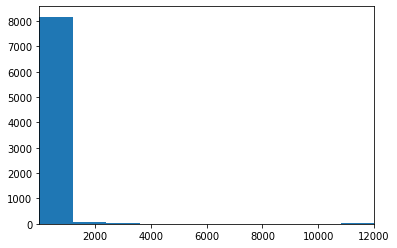

In [90]:
#https://matplotlib.org/3.3.1/gallery/statistics/hist.html
plt.hist(np.array(tup_ppg_nan)[0:,1].astype(int))
plt.xlim(1,12001)

In [102]:
df_ppg_nan = pd.DataFrame(tup_ppg_nan, columns = ['file_name', 'n_nan'])
df_ppg_nan.loc[df_ppg_nan['n_nan'].isin([2008,2030]),'file_name']

868     4.0,7972,PACU1_5_201013_140323.csv
7852    7.0,6148,PACU1_4_200626_154516.csv
Name: file_name, dtype: object

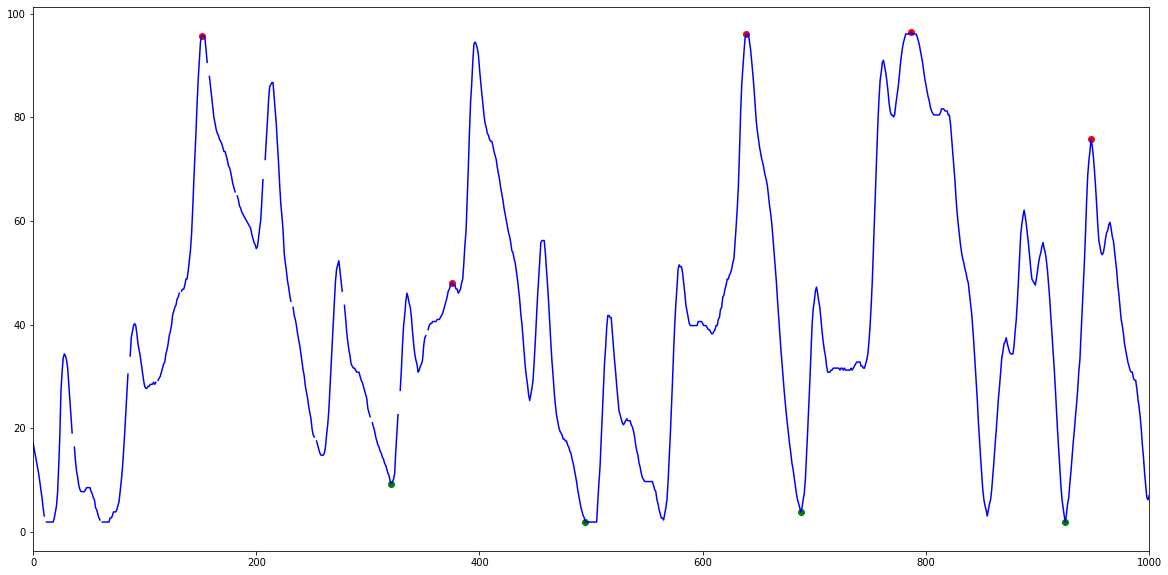

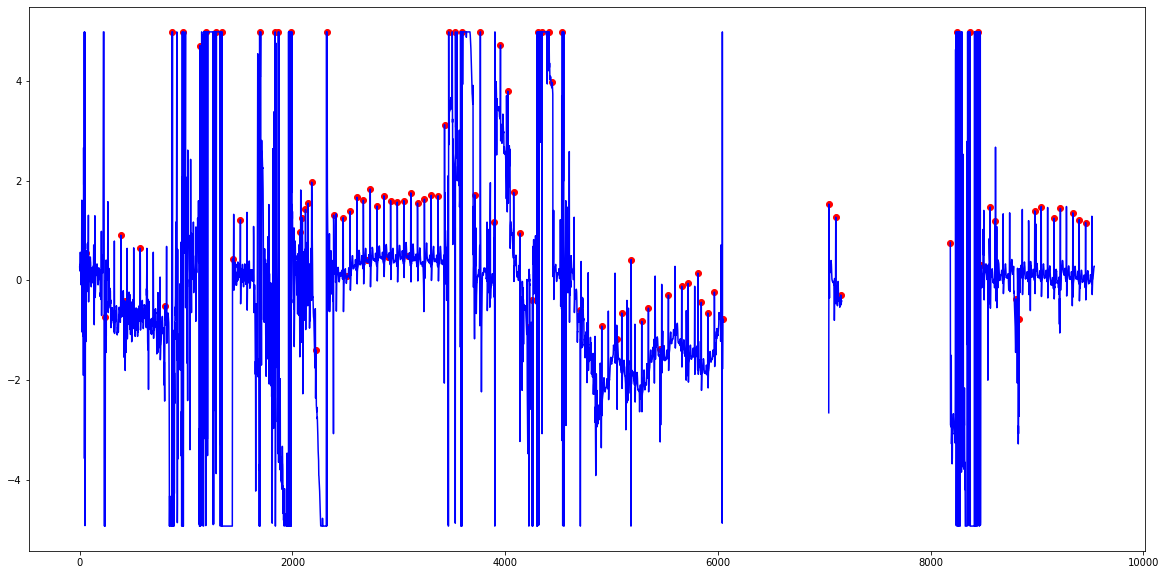

In [126]:
f_example = '4.0,7972,PACU1_5_201013_140323.csv'
f_ppg = 'cache/PPG_peaks/'+f_example
e_ppg = 'cache/ECG_peaks/'+f_example
vital_path = 'NRS_vital_pickle_unzip/NRS_vital_pickle'

df_vital = pickle.load(open(vital_path+'/'+f_example, 'rb'))

minlist, maxlist = pickle.load(open(f_ppg,'rb'))
r_peak_list = pickle.load(open(e_ppg, 'rb'))

plt.figure(figsize=(20,10))
plt.plot(df_vital['Pleth'].tolist(), color = 'blue')
plt.scatter(maxlist, [df_vital['Pleth'].tolist()[i] for i in maxlist], color = 'red', label = 'maxlist')
plt.scatter(minlist, [df_vital['Pleth'].tolist()[i] for i in minlist], color = 'green', label = 'minlist')
plt.xlim(0, 1000)

plt.figure(figsize=(20,10))
plt.plot(df_vital['ECG'].tolist(), color = 'blue')
plt.scatter(r_peak_list, [df_vital['ECG'].tolist()[i] for i in r_peak_list], color = 'red')

In [118]:
df_preprocess = pickle.load(open('cache/df_preprocess_total','rb'))

bool_mask = df_preprocess['file_path'].isin(['4.0,7972,PACU1_5_201013_140323.csv'])
df_target = df_preprocess.loc[bool_mask]

for col in df_target.columns:
    print(col, df_target.loc[868, col])

file_path 4.0,7972,PACU1_5_201013_140323.csv
1 (False, [0.014985014985014986, 0.0, 0.0], [0.5, 1.0])
2 (False, [0.0, 0.0, 0.0], [0.6666666666666666, 1.0])
3 (False, [0.0, 0.0, 0.0], [1.0, 1.0])
4 (False, [0.0, 0.0, 0.0], [1.0, 0.9230769230769231])
5 (False, [0.0, 0.0, 0.0], [1.0, 1.0])
6 (False, [0.0, 0.0, 0.0], [1.0, 0.5263157894736842])
7 (False, [0.0, 0.0, 0.0], [1.0, 1.0])
8 (False, [0.0, 0.0, 0.0], [1.0, 1.0])
9 (False, [0.0, 0.0, 0.0], [1.0, 1.0])
10 (False, [0.0, 0.0, 0.0], [1.0, 0.875])
11 (False, [0.0, 0.0, 0.0], [0.6666666666666666, 0.9166666666666666])
12 (False, [0.4515484515484515, 0.4515484515484515, 0.0009999999999999998], [0.5, 1.0])
13 (False, [0.951048951048951, 0.951048951048951, 0.0009999999999999998], [nan, nan])
14 (False, [0.8791208791208791, 0.8781218781218781, 0.0009999999999999998], [nan, 0.0])
15 (False, [0.8791208791208791, 0.8781218781218781, 0.0009999999999999998], [nan, 0.0])
16 (False, [0.6843156843156843, 0.6843156843156843, 0.0], [nan, 1.0])
17 (False,

In [147]:
valid_cnt, err_cnt = 0, 0
column_list = [str(i) for i in range(1,24)]
row_valid_perc = []

for _, row in df_preprocess.iterrows():
    row_valid_cnt = 0
    try:
        for column in column_list:
            if row[column][0]:
                row_valid_cnt += 1
                valid_cnt += 1
    except TypeError as e:
        err_cnt += 1
    row_valid_perc.append(row_valid_cnt)

In [158]:
print('값이 없는 데이터:', err_cnt,'/', 8318, '({:.2f}%)'.format(err_cnt/8318*100))
print('전처리 통과한 비율: ', (valid_cnt),'/',(8318-err_cnt)*23,'({:.2f}%)'.format(valid_cnt/(8318-err_cnt)/23*100)) #, format((valid_cnt/(8318-err_cnt)/23),'.2f'),')')
      

값이 없는 데이터: 23 / 8318 (0.28%)
전처리 통과한 비율:  153328 / 190785 (80.37%)


In [163]:
df_preprocess = pickle.load(open('cache/df_preprocess_total','rb'))

In [167]:
NRS_list = []
for _, row in df_preprocess.iterrows():
    NRS_list.append(float(row['file_path'][0:3]))

Counter({5.0: 2208, 3.0: 1285, 4.0: 1213, 6.0: 997, 7.0: 951, 8.0: 916, 2.0: 500, 9.0: 177, 10.0: 42, 1.0: 5, 7.5: 1})


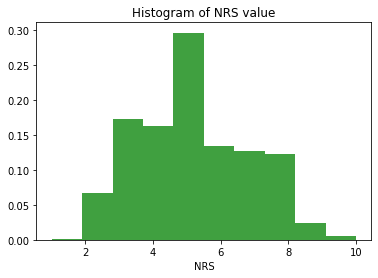

In [176]:
hist_NRS = Counter(NRS_list)
print(hist_NRS)

plt.hist(NRS_list, density = 1, facecolor = 'g', alpha = 0.75)

plt.xlabel('NRS')
plt.title('Histogram of NRS value')
plt.tick_params(axis = 'x', which = 'both', direction = 'out')
plt.show()

In [162]:
np.array([1.0, 2.4, 2.6, 2.0], dtype = int)

array([1, 2, 2, 2])

## Data Normalization

In [179]:
#df_preprocess = pickle.load(open('../Preprocessing/cache/df_preprocess_total', 'rb'))

vital_path = '../Preprocessing/NRS_vital_pickle_unzip/NRS_vital_pickle'
row_cnt = 0
SRATE = 100 # 100Hz
LEN_INPUT = 10 * SRATE # input 길이는 10초

x_total, y_total = [], []

for _, row in df_preprocess.iterrows():
    row_cnt +=1
    print('loading data',row_cnt,"...")
    # vital data loading
    df_vital = pickle.load(open(vital_path+'/'+row['file_path'], 'rb')).reset_index()

    # 한 NRS에 대해 23개의 input 확인
    for i in range(23):
        # input이 전처리 통과한 경우
        if row[str(i+1)][0]:
            start_idx = i*5*SRATE # 500i
            end_idx = (i*5 + LEN_INPUT)*SRATE # 500i + 1000

            df_vital_input = df_vital.loc[start_idx:end_idx]

            pleth_inp = df_vital_input['Pleth'].tolist()
            pleth_inp = pleth_inp - np.mean(pleth_inp)
            ecg_inp = np.array(df_vital_input['ECG'].tolist())
            ecg_inp = (ecg_inp-ecg_inp.min()) / (ecg_inp.max()-ecg_inp.min())
            
            #x_total.append(pleth_inp + df_vital_input['ECG'].tolist())
            #y_total.append(float(row['file_path'][0:3]))
    break

loading data 1 ...


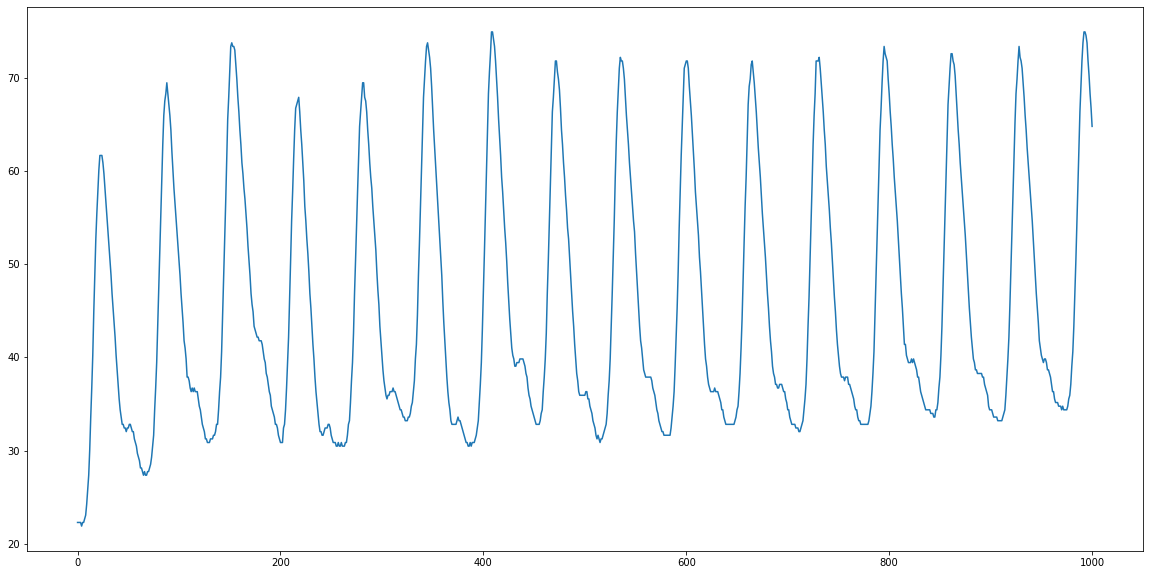

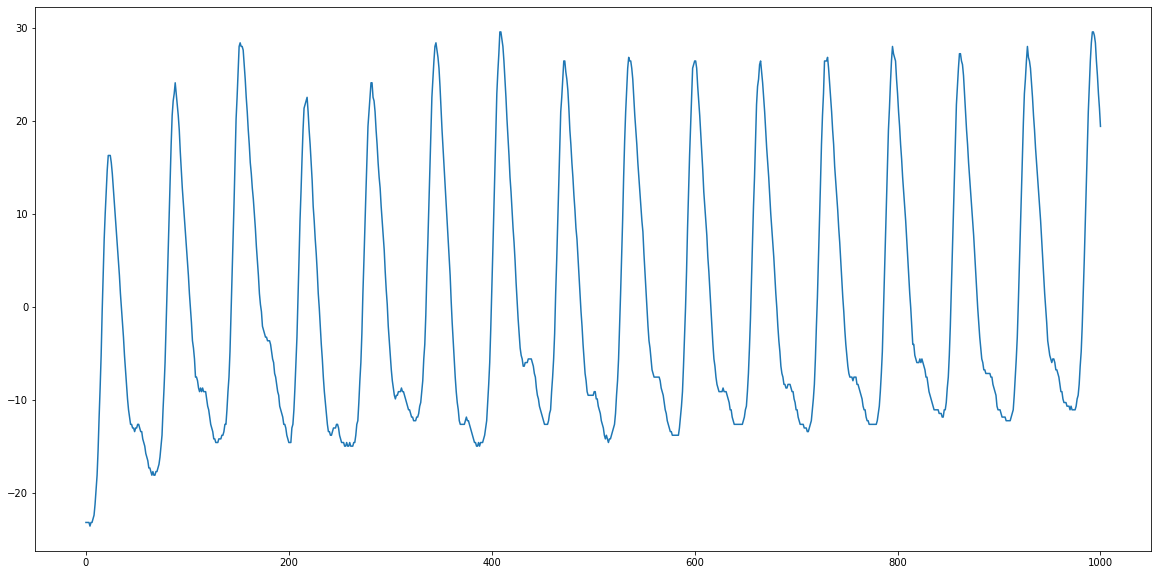

In [194]:
# plotting normalized input

x_ppg = (df_vital_input['Pleth'].tolist())
norm_ppg = x_ppg - np.mean(x_ppg)



plt.figure(figsize=(20,10))
plt.plot(x_ppg)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(norm_ppg)
plt.show()

#plt.figure(figsize=(20,10))
#plt.plot(norm_ecg3[0])
#print(np.linalg.norm(x_ecg))

StandardScaler()


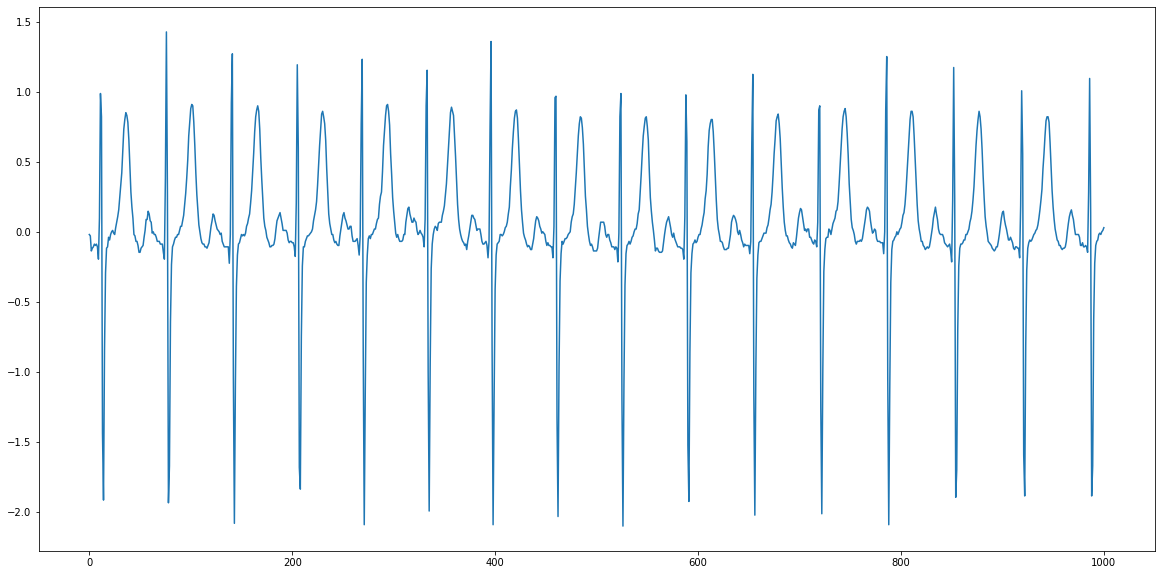

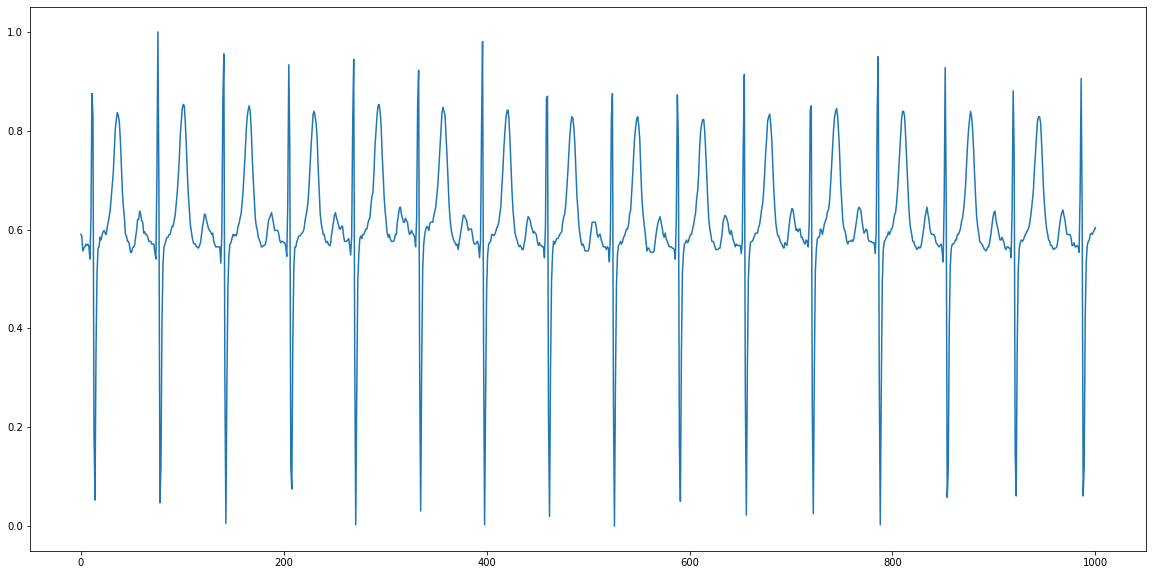

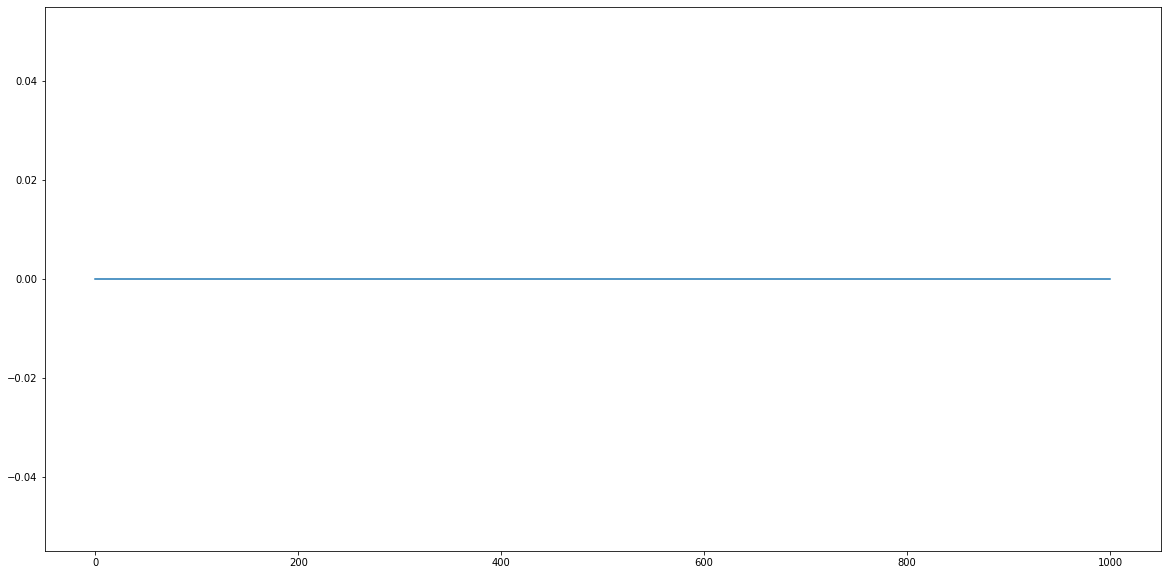

In [193]:
# plotting normalized input
from sklearn.preprocessing import StandardScaler

x_ecg = np.array(df_vital_input['ECG'].tolist())
norm_ecg1 = (x_ecg - x_ecg.min())/(x_ecg.max()-x_ecg.min())
norm_ecg2 = x_ecg / np.linalg.norm(x_ecg)

standardScaler = StandardScaler()
print(standardScaler.fit([x_ecg]))
norm_ecg3 = standardScaler.transform([x_ecg])

plt.figure(figsize=(20,10))
plt.plot(x_ecg)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(norm_ecg1)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(norm_ecg3[0])
#print(np.linalg.norm(x_ecg))

In [8]:
import pandas as pd
df_ex = pd.DataFrame([[1,2], [3,4], [5,6]])
df_d = df_ex.loc[0:2]
print((df_d))

   0  1
0  1  2
1  3  4
2  5  6


In [13]:
list_a = ([0, 1, np.nan, np.nan, 1])

list_c = (list_a - np.nanmean(list_a) ) / np.nanstd(list_a)
list_c

array([-1.41421356,  0.70710678,         nan,         nan,  0.70710678])